### importing the dataset

In [1]:
#data manipulation library
import pandas as pd
import nltk

In [2]:
#reading the dataset
tweet_df = pd.read_csv('/content/drive/MyDrive/projects/Tweets.csv')
tweet_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


Here, the dataset has been imported from google drive

---
### Data Sanity checks

In [3]:
#checking the shape of the dataset
shape = tweet_df.shape
print('The tweet dataset has', shape[0], 'rows')
print('The tweet dataset has', shape[1], 'columns')

The tweet dataset has 14640 rows
The tweet dataset has 15 columns


The above output shows the number of rows and columns in the tweet dataset

In [4]:
#checking missing values
tweet_df.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

The dataset has many columns that have missing values. The column that has the most missing values is the *negativereason_gold* column

In [5]:
#checking the datatypes of the columns
tweet_df.dtypes

tweet_id                          int64
airline_sentiment                object
airline_sentiment_confidence    float64
negativereason                   object
negativereason_confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_location                   object
user_timezone                    object
dtype: object

The columns have different data types. There are integers, floats and string datatypes

In [6]:
#checking for duplicates
tweet_df.duplicated().sum()

36

There are 36 duplicated values in the dataset

In [7]:
#checking the dataset info
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

This provides a summary of the dataset. The dataset has 2 float columns, 2 int columns and 11 object columns

In [8]:
#checking the statistical summary of the numeric column'
tweet_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tweet_id,14640.0,5.692184e+17,7.791112e+14,5.675883e+17,5.685592e+17,5.694779e+17,5.698905e+17,5.703106e+17
airline_sentiment_confidence,14640.0,9.001689e-01,1.628300e-01,3.350000e-01,6.923000e-01,1.000000e+00,1.000000e+00,1.000000e+00
negativereason_confidence,10522.0,6.382983e-01,3.304398e-01,0.000000e+00,3.606000e-01,6.706000e-01,1.000000e+00,1.000000e+00
retweet_count,14640.0,8.265027e-02,7.457782e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.400000e+01


The output above provides a summary of statistics such as count, mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for the numeric columns

In [9]:
#checking the statistical summary of the text columns
tweet_df.describe(include = 'object').T

,count,unique,top,freq
airline_sentiment,14640,3,negative,9178
negativereason,9178,10,Customer Service Issue,2910
airline,14640,6,United,3822
airline_sentiment_gold,40,3,negative,32
name,14640,7701,JetBlueNews,63
negativereason_gold,32,13,Customer Service Issue,12
text,14640,14427,@united thanks,6
tweet_coord,1019,832,"[0.0, 0.0]",164
tweet_created,14640,14247,2015-02-24 09:54:34 -0800,5
tweet_location,9907,3081,"Boston, MA",157


The output above shows the statistical summary of categorical columns.

It shows:
> - count: Number of non-null entries in each column.
> - unique: Number of distinct values in each column.
> - top: Most frequently occurring value in each column.
> - freq: Frequency of the most common value.

Some of the columns displayed in the output above include:

**airline_sentiment:**

>- count: 14640 entries (non-null values).
> - unique: 3 unique values.
> - top: The most frequent value is 'negative'.
> - freq: 'negative' appears 9178 times.


**negativereason:**

> - count: 9178 entries.
> - unique: 10 unique values.
> - top: 'Customer Service Issue' is the most frequent reason.
> - freq: 'Customer Service Issue' appears 2910 times.

**airline:**

> - count: 14640 entries.
> - unique: 6 unique values.
> - top: 'United' is the most frequent airline.
> - freq: 'United' appears 3822 times.

**airline_sentiment_gold:**

> - count: 40 entries.
> - unique: 3 unique values.
> - top: 'negative' is the most frequent value.
> - freq: 'negative' appears 32 times.


---

### EDA


In [10]:
#Importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

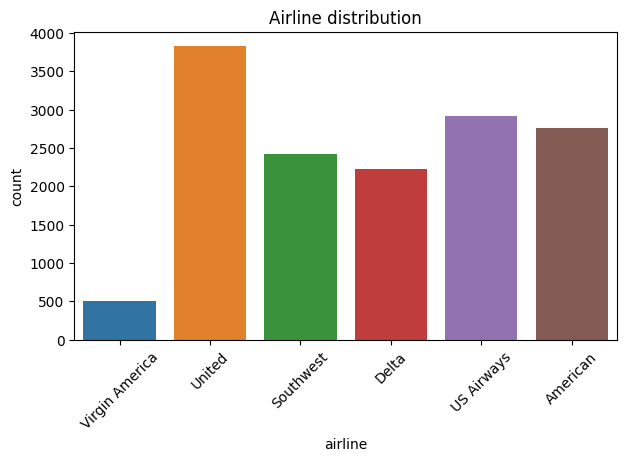

In [11]:
#showing the flight distribution
plt.figure(figsize = (7,4))
sns.countplot(data = tweet_df, x = 'airline')
plt.title('Airline distribution')
plt.xticks(rotation = 45)
plt.show()

The above output shows the distributions of airlines. The united airline is the most used airline. The virgin america is the least used airline.


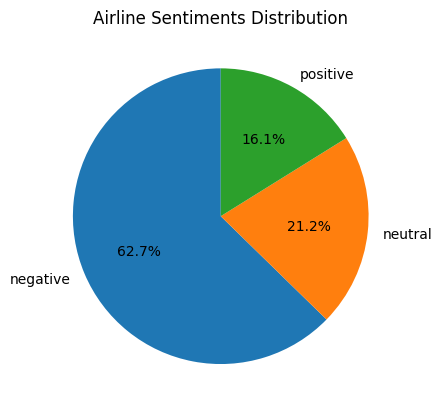

In [12]:
#visualizing the sentiments
sentiments = tweet_df.airline_sentiment.value_counts()
plt.pie(sentiments, labels = sentiments.index, autopct='%1.1f%%', startangle=90)
plt.title('Airline Sentiments Distribution')
plt.show()

The pie chart illustrates the distribution of sentiments in the dataset. Negative sentiments constitute the majority, representing 62.7% of all sentiments, while positive sentiments are less prevalent, accounting for only 16.1%



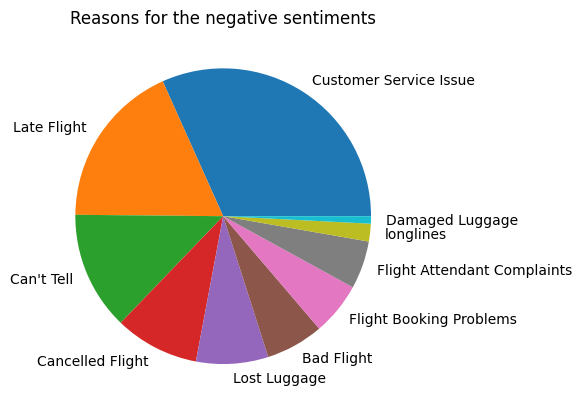

In [13]:
#plotting the negative reason sentiment to see which reason was leading
neg_sentiments = tweet_df.negativereason.value_counts()
plt.pie(neg_sentiments, labels = neg_sentiments.index)
plt.title('Reasons for the negative sentiments')
plt.show()

The predominant reasons for negative sentiments are attributed to customer service issues, comprising the largest share, followed by concerns related to late flights. This analysis underscores the importance of addressing customer service challenges to enhance overall customer satisfaction

---
### Feature Engineering

In [14]:
#dropping duplicates
tweet_df.drop_duplicates(inplace = True)
print(tweet_df.duplicated().sum())

0


Duplicates in the dataset have been dropped

In [15]:
tweet_df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [16]:
#creating a dataframe of the columns needed
df = tweet_df[['airline_sentiment', 'text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


Here, a new dataframe that contains the columns needed to work on the dataset has been created

In [17]:
#importing a label encoder
from sklearn.preprocessing import LabelEncoder
#initializing the encoder
le = LabelEncoder()
#encoding the data
df['target'] = le.fit_transform(df['airline_sentiment'])
df.head()

<ipython-input-17-d5d3955c3f96>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target'] = le.fit_transform(df['airline_sentiment'])


,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,1
1,positive,@VirginAmerica plus you've added commercials t...,2
2,neutral,@VirginAmerica I didn't today... Must mean I n...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


Here, label encoder has been used to encode the target variable from text to numbers.

In [18]:
X = df.drop(['target', 'airline_sentiment'], axis = 1)
y = df.pop('target')

We have then proceeded to separate the dependent and independent variables in the dataset. The dependent variable being the airline sentiment and the independent variable being the text

---
### Model Building

In [19]:
#importing the necessary
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report

These are the libraries that will be used to model the data

In [20]:
#splitting the data to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 1, stratify = y)
X_train.head()

,text
10831,@USAirways waiting for bags now over 25min in ...
10524,@USAirways Can't wait for the trip. Thanks for...
11888,@AmericanAir Mold on my flight?!? US3825 #filt...
4663,@SouthwestAir Just wanted 2 change an anytime ...
5156,@SouthwestAir I'll do that. Can't DM until you...


In [21]:
vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1, 3))
X_train_tfidf = vectorizer.fit_transform(X_train['text'])
X_test_tfidf = vectorizer.transform(X_test['text'])


In this step, the textual content of both the training and testing datasets has undergone vectorization. This process transforms the words into a format suitable for utilization by the logistic regression model.

In [22]:
print("X_train_tfidf shape:", X_train_tfidf.shape)
print("y_train shape:", y_train.shape)


X_train_tfidf shape: (10953, 10000)
y_train shape: (10953,)


Here we are confirmimng the vectorization.
The training data (X_train_tfidf) has a shape of (10953, 10000):
> - The first number (10953) represents the number of samples in the training data. Each sample is a piece of text that has been transformed into a feature vector using the TF-IDF vectorization method.

> - The second number (10000) represents the number of features for each sample. In TF-IDF, each unique word in the corpus is considered a feature, and here, it seems that there are 10,000 unique features in this vectorized representation.

The labels for the training data (y_train) have a shape of (10953,):
> - The single number (10953) represents the number of labels in the training set. Each label corresponds to a sample in the training data.

---
### Fitting a logistic regression model

In [23]:
#initializing the model
logreg = LogisticRegression(multi_class = 'ovr', max_iter = 500)
#fitting the data on the training set
logreg.fit(X_train_tfidf, y_train)

LogisticRegression(max_iter=500, multi_class='ovr')

In this segment of the code, a logistic regression model is initialized, specifically using the one-vs-rest (OvR) strategy for multiclass classification. The logistic regression model is then fitted to the training data, which involves adjusting its parameters to learn from the provided input features and their corresponding target labels. Notably, the OvR strategy allows the logistic regression model to handle multiclass classification by training a separate binary classification model for each class.

The parameter max_iter is set to 500, determining the maximum number of iterations taken for the solver to converge. This parameter influences the convergence of the optimization algorithm used by the logistic regression model.

In [24]:
preds = logreg.predict(X_test_tfidf)
#getting the accuracy score
logreg_accuracy = accuracy_score(y_test, preds)
print("The accuracy of the model is: ", logreg_accuracy)

The accuracy of the model is:  0.7910161599561764


The model has an accuracy of 79 percent

In [25]:
#printing the classification report
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87      2290
           1       0.74      0.47      0.58       773
           2       0.82      0.54      0.65       588

    accuracy                           0.79      3651
   macro avg       0.79      0.66      0.70      3651
weighted avg       0.79      0.79      0.77      3651



Here the classification report gives us the report of very important metrics. The report contains the following:
- **Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It indicates how many of the predicted positive instances are actually positive.

- **Recall**: Recall, or sensitivity, or true positive rate, is the ratio of correctly predicted positive observations to the all observations in actual class. It indicates how many of the actual positive instances were correctly predicted.

- **F1-Score**: The F1-score is the weighted average of precision and recall. It is a harmonic mean of precision and recall and ranges between 0 and 1.

These are the precision, recall, and F1-score values for each class.

**Class 0**
> - Precision: 0.80 (80% of predicted class 0 instances are correct)
> - Recall: 0.96 (96% of actual class 0 instances are correctly predicted)
> - F1-Score: 0.87 (harmonic mean of precision and recall)

**Class 1**
> - Precision: 0.74 (74% of predicted class 0 instances are correct)
> - Recall: 0.47 (47% of actual class 0 instances are correctly predicted)
> - F1-Score: 0.58 (harmonic mean of precision and recall)

**Class 2**
> - Precision: 0.82 (82% of predicted class 0 instances are correct)
> - Recall: 0.54 (54% of actual class 0 instances are correctly predicted)
> - F1-Score: 0.65 (harmonic mean of precision and recall)

From the output, the worst class when it came to predictions is class 1.

---

### Using SGD model to fit the data and make predictions on it

In [26]:
#importing the model
from sklearn.linear_model import SGDClassifier

In [27]:
#initializing the model
sgd = SGDClassifier(loss='log', random_state=42, max_iter=1000, tol=1e-3)

# Fitting the model on the training data
sgd.fit(X_train_tfidf, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', random_state=42)

In this section of the code, a Stochastic Gradient Descent (SGD) classifier is initialized. The loss='log' parameter specifies that the logistic loss function will be used. The random_state=42 ensures reproducibility by seeding the random number generator.

The max_iter=1000 parameter denotes the maximum number of iterations or passes over the entire training dataset that the SGD algorithm will undergo. A higher number of iterations can allow the model to converge more accurately.

In [28]:
#making predictions on the test data
sgd_pred = sgd.predict(X_test_tfidf)

#getting the accuracy score
sgd_accuracy = accuracy_score(y_test, sgd_pred)
print(sgd_accuracy)

0.7901944672692413


The model achieved an overall accuracy of 79%, indicating that approximately 79% of the predictions were correct across all classes. This accuracy level is consistent with the logistic regression model's performance, suggesting that both models exhibit similar effectiveness in making correct predictions.

In [29]:
#pritning the classification report
sgd_report = classification_report(y_test, sgd_pred)
print(sgd_report)

              precision    recall  f1-score   support

           0       0.79      0.96      0.87      2290
           1       0.74      0.47      0.57       773
           2       0.82      0.54      0.65       588

    accuracy                           0.79      3651
   macro avg       0.79      0.66      0.70      3651
weighted avg       0.79      0.79      0.77      3651



These are the precision, recall, and F1-score values for each class.

**Class 0**
> - Precision: 0.79 (79% of predicted class 0 instances are correct)
> - Recall: 0.96 (96% of actual class 0 instances are correctly predicted)
> - F1-Score: 0.87 (harmonic mean of precision and recall)

**Class 1**
> - Precision: 0.74 (74% of predicted class 0 instances are correct)
> - Recall: 0.47 (47% of actual class 0 instances are correctly predicted)
> - F1-Score: 0.57 (harmonic mean of precision and recall)

**Class 2**
> - Precision: 0.82 (82% of predicted class 0 instances are correct)
> - Recall: 0.54 (54% of actual class 0 instances are correctly predicted)
> - F1-Score: 0.65 (harmonic mean of precision and recall)

From the output, the worst class when it came to predictions is class 1. This model is performing similar to the logistic regression model